<a href="https://colab.research.google.com/github/DaCheeseWhale/OGCheese/blob/master/Math_3012_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math 3012 Project 
## Semantic Networks and Graphs
### Mehul Kalia, Vishaal Kareti, and Darren Key 


In [ ]:
#@title Import Libraries 

#@markdown Loads the required libraries 

import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline 

In [ ]:
#@title Text Input  

#@markdown Enter the text that needs to be analyzed here 

# import text

sample_text = input("Paste your text here: ") 

sample_text = sample_text.lower() 
print(sample_text)

Paste your text here: Good afternoon. My fellow Americans, last night, we saw the President of the United States, lie to the American people and repeatedly lie about the state of this pandemic. We saw him refuse to take responsibility for the crisis that should have been met with real presidential leadership. Instead it has cost hundreds of thousands of Americans lives and pushed millions into poverty. We saw him diminish the pain felt by so many Americans. President Trump said, “We’re rounding the corner. It’s going away. We’re learning to live with it.” There are quotes, but as I told them last night, We’re not learning to live with it, we’re learning to die with it.” This is a dark winter ahead. Already more than 220,000 people in the United States of America have lost their lives to this virus. 220,000 empty chairs at dinner tables all across this country. My heart goes out to every single person who’s had to endure the agony of saying goodbye to someone they loved and adored over 

In [ ]:
#@title Noun Extraction  

#@markdown Extracts nouns from the string that was inputted

def get_nouns(sent):
  nounIndices = []
  prevIndex = -1
  nlp_text = nlp(sent)
  for tok in range(len(nlp_text)):
      token = nlp_text[tok]
      if token.pos_ == 'NOUN' or token.pos_ == "PROPN":
          if len(nounIndices) != 0:
            noun_relations.append(tok - prevIndex)
            prevIndex = tok
          else:
            prevIndex = tok
          nounIndices.append(token.text)
  return nounIndices

In [ ]:
#@title Noun Formatting

#@markdown Formats pairs to be inputted into the graph, prints the noun position indexes in the source text, and connects adjacent nouns 


noun_source = []
noun_target = []
noun_relations = []

nounIC = get_nouns(sample_text)

noun_source = nounIC[0:-1]
noun_target = nounIC[1:]

print(nounIC)
print(noun_source)
print(noun_target)
print(noun_relations)

kg_df = pd.DataFrame({'source':noun_source, 'target':noun_target, 'edge':noun_relations})

['afternoon', 'americans', 'night', 'president', 'united', 'states', 'people', 'state', 'pandemic', 'responsibility', 'crisis', 'leadership', 'hundreds', 'thousands', 'americans', 'millions', 'poverty', 'pain', 'americans', 'president', 'trump', 'corner', 'quotes', 'night', 'winter', 'people', 'united', 'states', 'america', 'lives', 'virus', 'chairs', 'dinner', 'tables', 'country', 'heart', 'person', 'agony', 'video', 'chat', 'friends', 'family', 'mass', 'funeral', 'service', 'study', 'columbia', 'university', 'deaths', 'journal', 'america', 'world', 'editorial', 'knowledge', 'president', 'trump', 'end', 'quote', 'response', 'crisis', 'tragedy', 'covid-19', 'history', 'signs', 'virus', 'state', 'cases', 'trump', 'week', 'response', 'start', 'answer', 'deaths', 'united', 'states', '%', 'world', 'population', '%', 'deaths', 'success', 'failure', 'months', 'crisis', 'president', 'plan', 'family', 'america', 'horrors', 'death', 'toll', 'pain', 'americans', 'words', 'deeds', 'february', 'vi

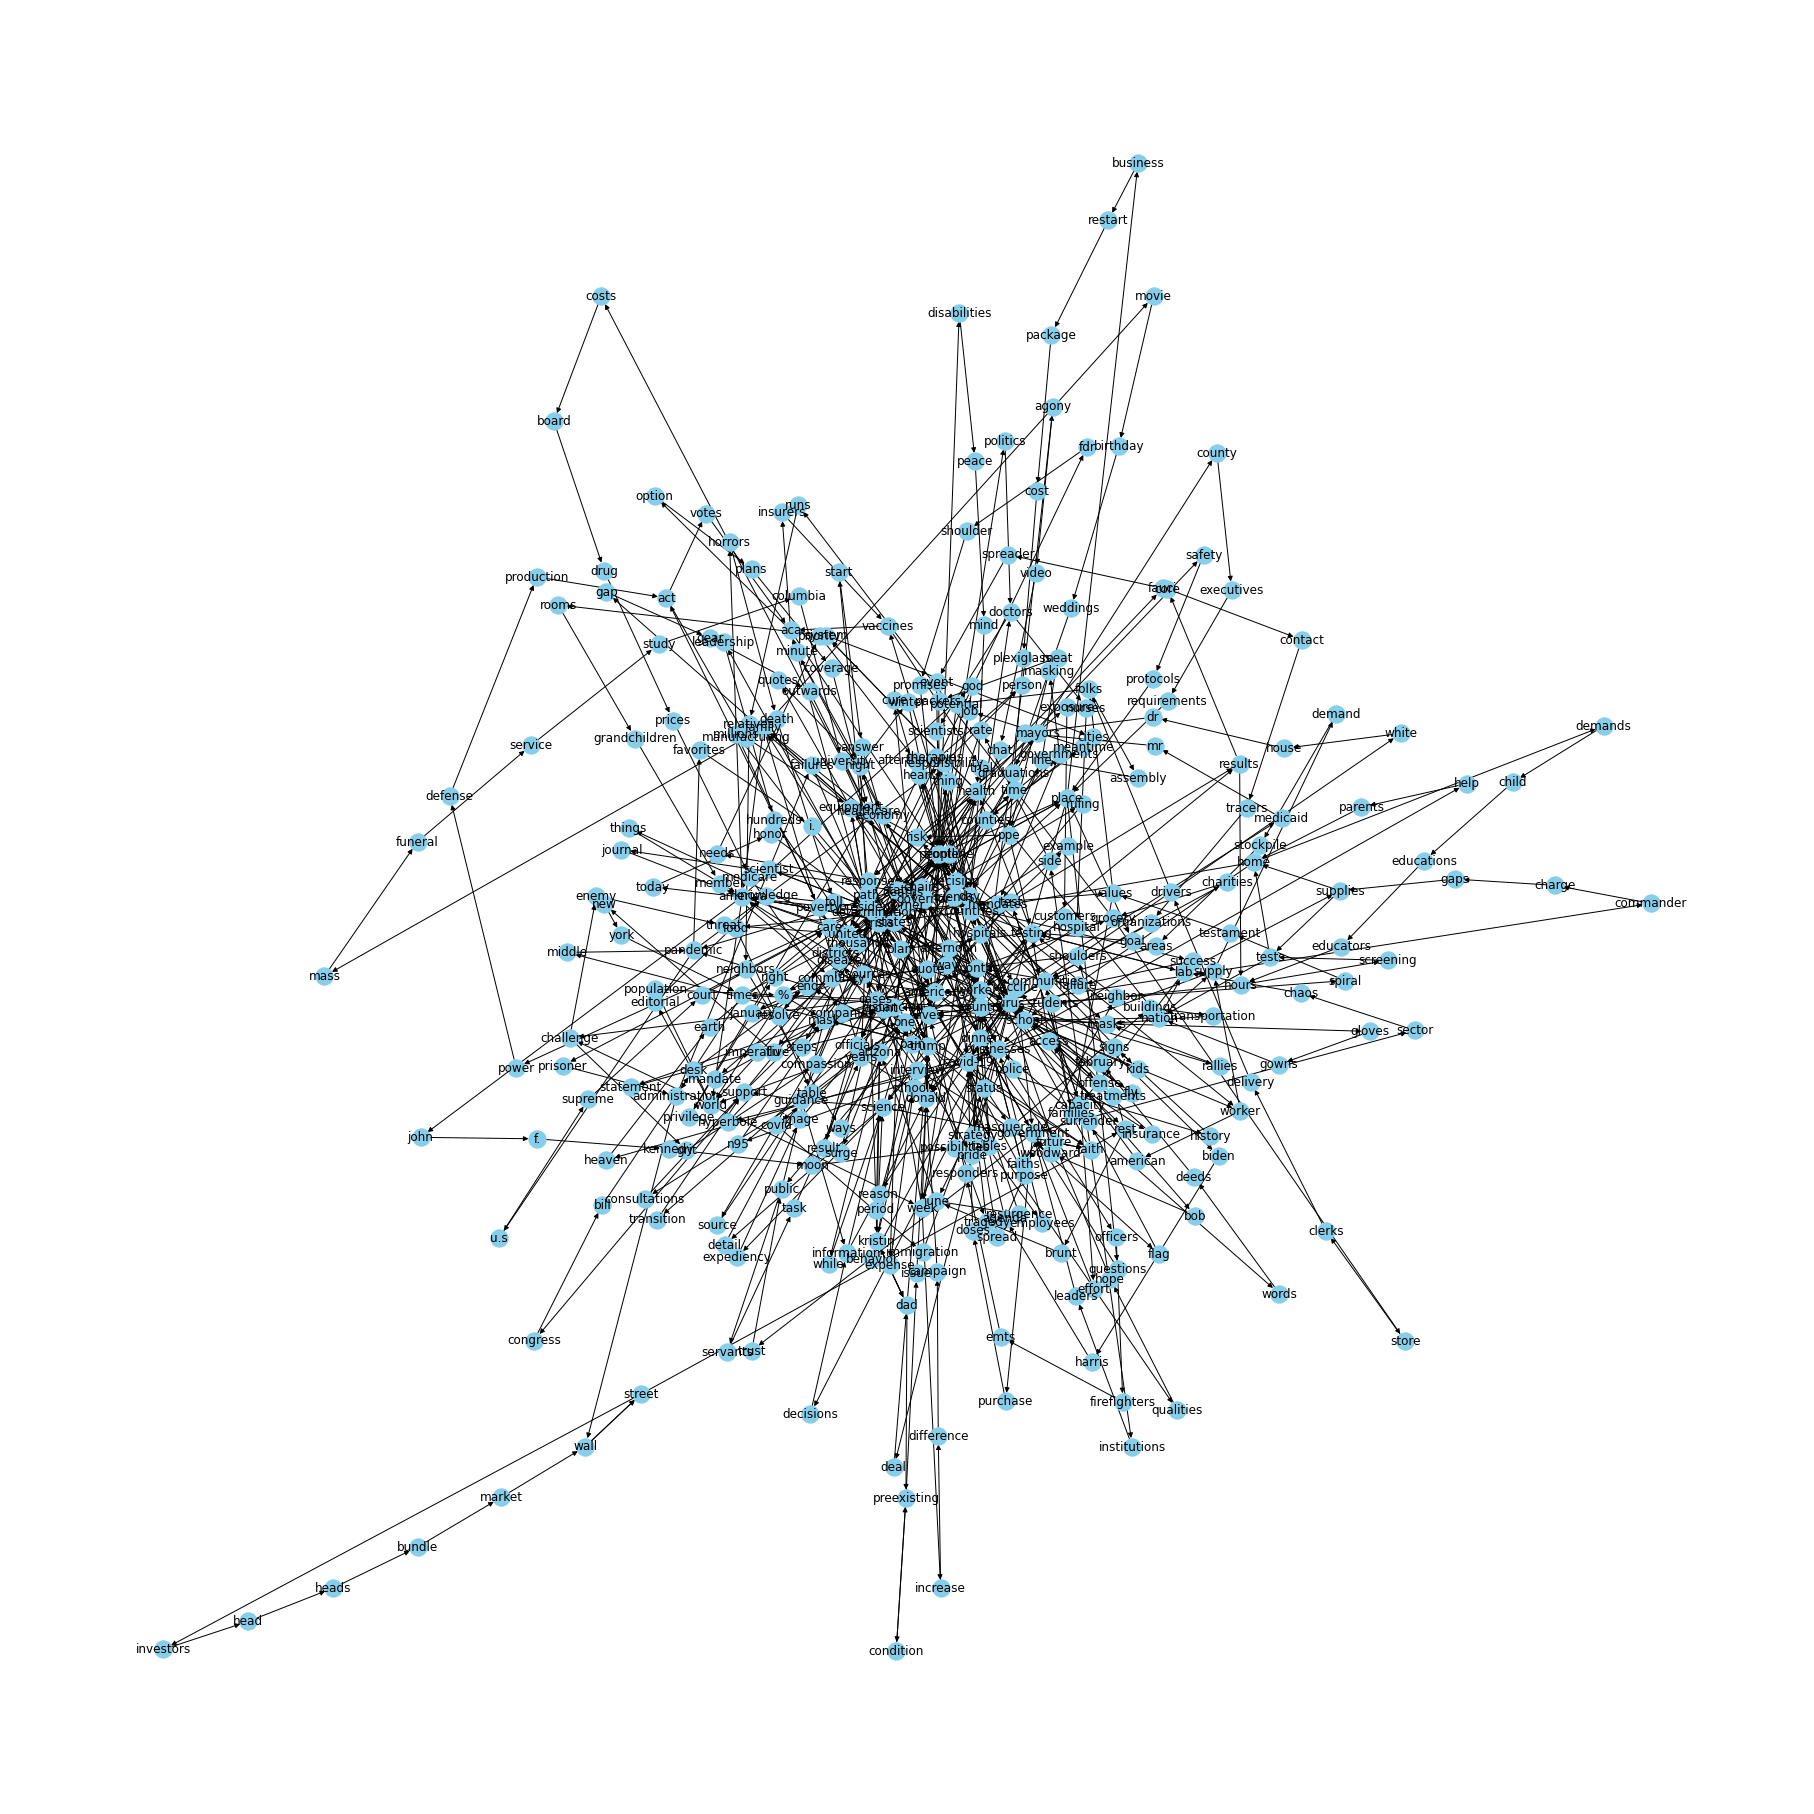

In [ ]:
#@title Graph Creation  

#@markdown Creates a directed-graph from a dataframe

#Undirected code: G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True)

G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True,create_using=nx.MultiDiGraph())

plt.figure(figsize=(25,25))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
#@title Graph Download

#@markdown Downloads a network file that can be read by Cytoscape to create a graph 

from google.colab import files

#nx.set_node_attributes(G, 'graphics', {'w': 20.0, 'h': 20.0, 'type': '"ellipse"', 'fill': '"#889999"', 'outline': '"#666666"', 'outline_width': 1.0})

nx.write_graphml(G,'g.xml')

files.download('g.xml') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Finding Neighbors

#@markdown Takes a word input and finds its related neighbors

try:
  word_similar = input("What word do you want to search up?" )

  neighbors = set(list(G.adj[word_similar]))

  #closest words
  print("Closest words:")
  for neighbor in neighbors:
    print(neighbor)


  #words 2 words away
  print("Next closest words:")
  second_neighbors_set = set()
  for neighbor in neighbors:
    second_neighbors = list(G.adj[neighbor])


    for second_neighbor in second_neighbors:
      second_neighbors_set.add(second_neighbor)

  second_neighbors_set.remove(word_similar
                              )
  for second_neighbor in second_neighbors_set:
    print(second_neighbor)
#if word not in
except:
  print("Word not in graph!")

What word do you want to search up?virus
Closest words:
supply
offense
treatments
deal
therapies
things
white
point
behavior
virus
lives
chairs
bob
governor
donald
heart
rallies
state
Next closest words:
commander
n95
governor
deal
bob
america
schools
pandemic
rallies
treatments
cases
things
therapies
united
white
person
health
trump
vaccine
governments
dinner
dad
state
line
offense
masks
public
period
demand
ruling
result
woodward
pride
donald
mayors
supply
house
equipment
mandate
behavior
day
point
lives
chairs
months
heart


# Testing

##igraph tingz~

In [ ]:
!pip install python-igraph
import igraph 
from igraph import *

In [ ]:
g = Graph()

##Testing Area

In [ ]:
inputText = input("Paste your text here: ") 
'''
Test text: 

My name is Bob. I like cheese.  I also like potatos. "Do you like cheese?" OwO poTato 
''' 
inputText = inputText.lower() 
if inputText[len(inputText) - 1] == " ": 
  inputText = inputText[:len(inputText) - 1] 
print("\n" + inputText) 


In [ ]:
index = 0
length = len(inputText)
while index < (length): 
  if inputText[index] == " ":  
    if inputText[index] == (inputText[index + 1]): 
      inputText = inputText[:index+1] + inputText[index+2:]
      index -= 1
      length -= 1
  elif inputText[index] == "." or inputText[index] == "?" or inputText[index] == "!" or inputText[index] == "\"" or inputText[index] == "'": 
    inputText = inputText[:index] + inputText[index+1:] 
    length -= 1
    index -= 1
  index += 1

splitText = inputText.split(" ")
for word in splitText:
  print(word) 
  

my
name
is
bob
i
like
cheese
i
also
like
potatos
do
you
like
cheese
owo
potato


In [ ]:
twoWords = []
for x in range(0,len(splitText) - 1): 
  twoWords.append(splitText[x] + " " + splitText[x + 1]) 

for words in twoWords:
  print(words) 

my name
name is
is bob
bob i
i like
like cheese
cheese i
i also
also like
like potatos
potatos do
do you
you like
like cheese
cheese owo
owo potato


## Language Model/Generation

In [ ]:

# code courtesy of https://nlpforhackers.io/language-models/
import nltk
nltk.download('punkt')

from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
 
# Let's transform the counts to probabilities
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

In [ ]:
import random

# starting words
text = ["today", "the"]
sentence_finished = False
 
while not sentence_finished:
  # select a random probability threshold  
  r = random.random()
  accumulator = .0

  for word in model[tuple(text[-2:])].keys():
      accumulator += model[tuple(text[-2:])][word]
      # select words that are above the probability threshold
      if accumulator >= r:
          text.append(word)
          break

  if text[-2:] == [None, None]:
      sentence_finished = True
 
print (' '.join([t for t in text if t]))

## mlt tingz~

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [ ]:
doc = nlp("Nagal won the first set.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Nagal ... nsubj
won ... ROOT
the ... det
first ... amod
set ... dobj
. ... punct


In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline 

print("Done")

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
file = '/content/drive/My Drive/Math Project/wiki_sentences_v2.csv' #@param {type: "string"}


In [ ]:
# import wikipedia sentences
candidate_sentences = pd.read_csv(file)
candidate_sentences.shape

(4318, 1)

In [ ]:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... amod
d823 ... pobj


In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [ ]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 4318/4318 [00:44<00:00, 96.81it/s] 


In [ ]:
entity_pairs[10:20]

[['we', 'tests'],
 ['m global', 'international sales rights'],
 ['robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['', 'military  arrest'],
 ['train', 'vuk'],
 ['telepath', 'gallio'],
 ['singer', 'men']]

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
get_relation("John completed the task") 

'completed'

In [ ]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 4318/4318 [00:42<00:00, 101.46it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

is               370
was              297
released on       87
include           73
were              71
are               71
released          40
's                38
composed by       35
have              31
has               31
became            31
become            29
released in       27
included          26
produced          22
called            22
considered        20
made              20
had               20
been              18
be                18
used              17
scheduled         17
stars             16
directed by       16
written by        15
set               14
hired             14
wrote             14
produced by       14
received          13
introduced in     13
went              13
wanted            12
began in          11
won               11
began             11
gave              10
sold              10
features          10
includes           9
produced in        9
reported           9
opened             9
gives              9
directed           9
known as     

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

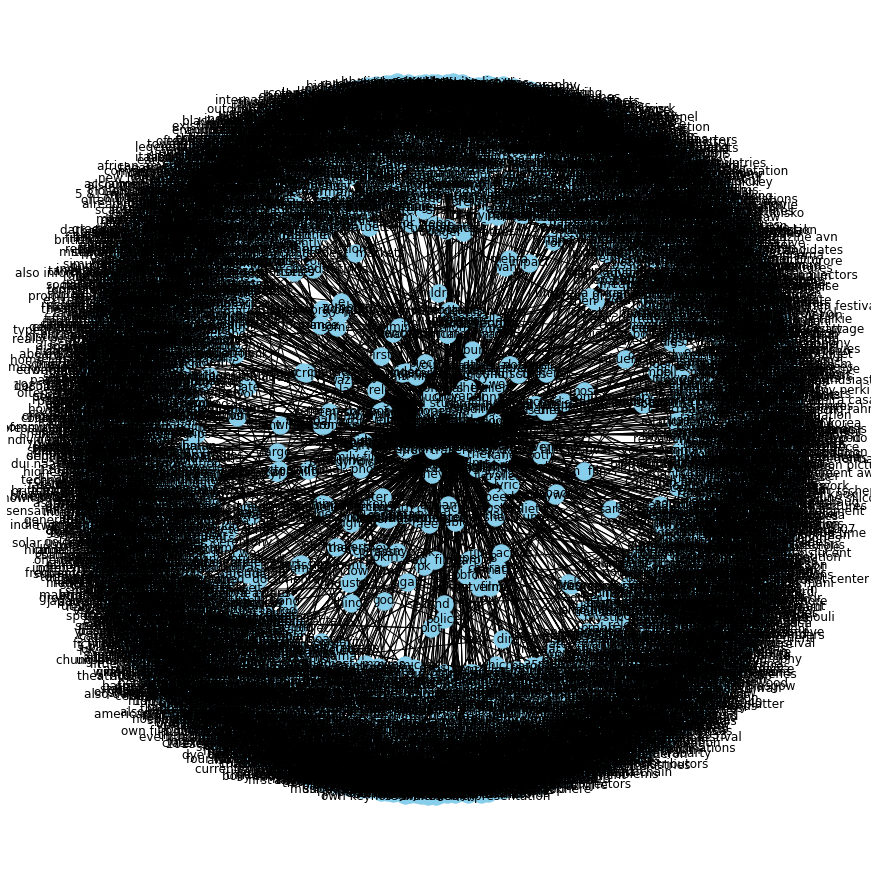

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

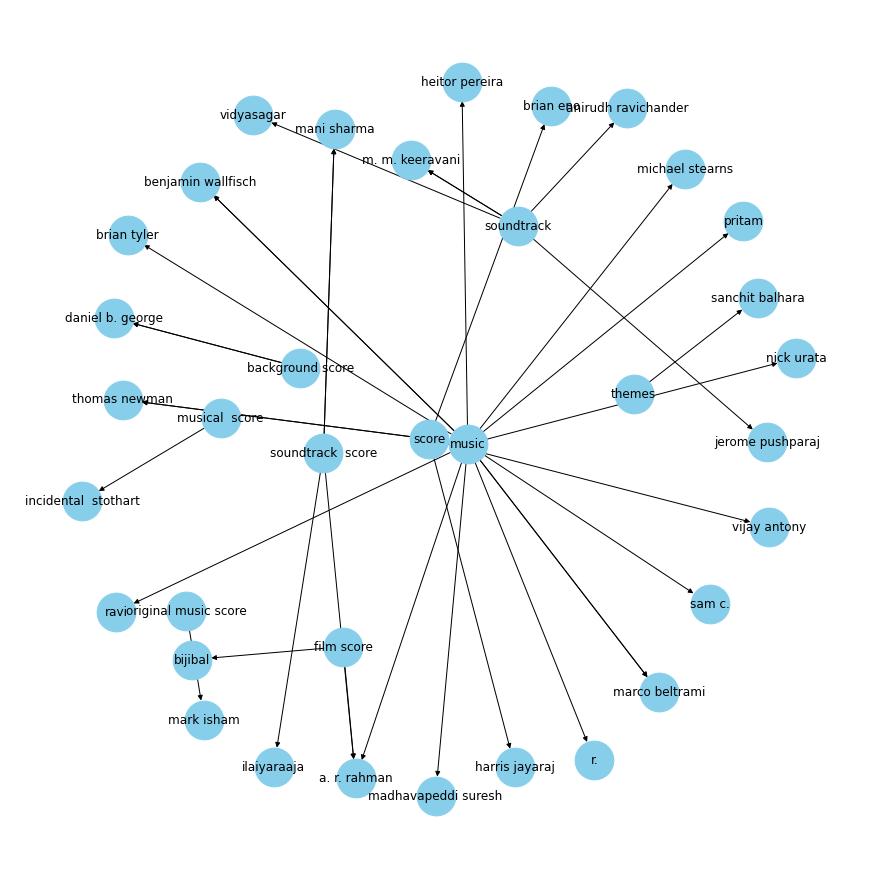

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

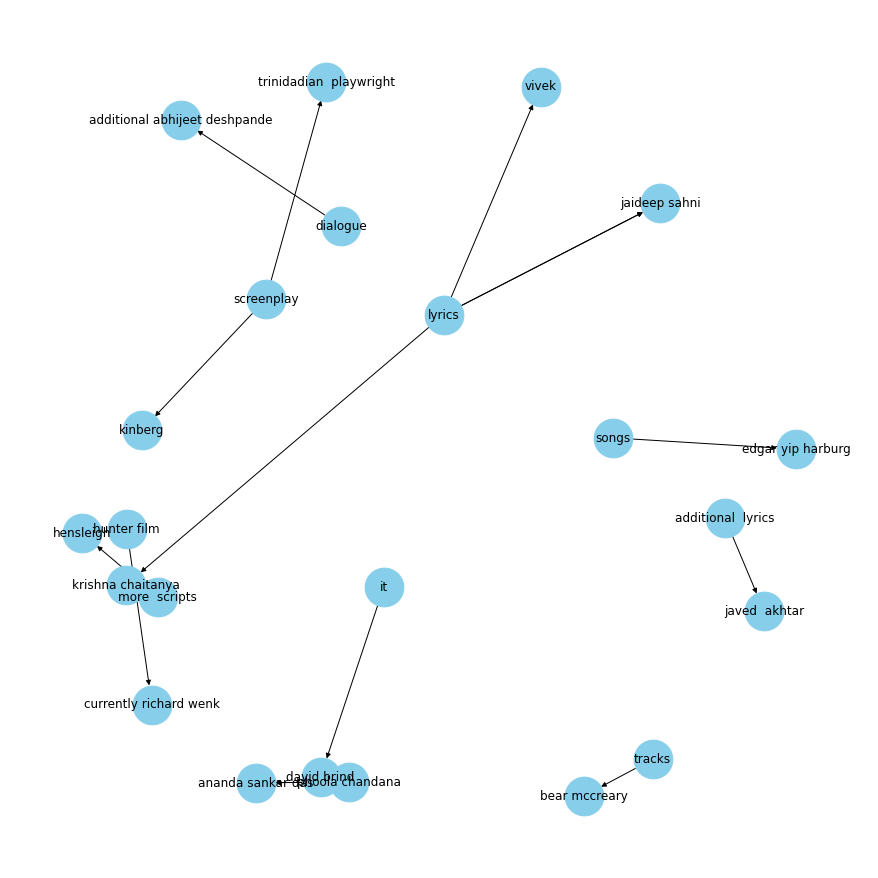

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

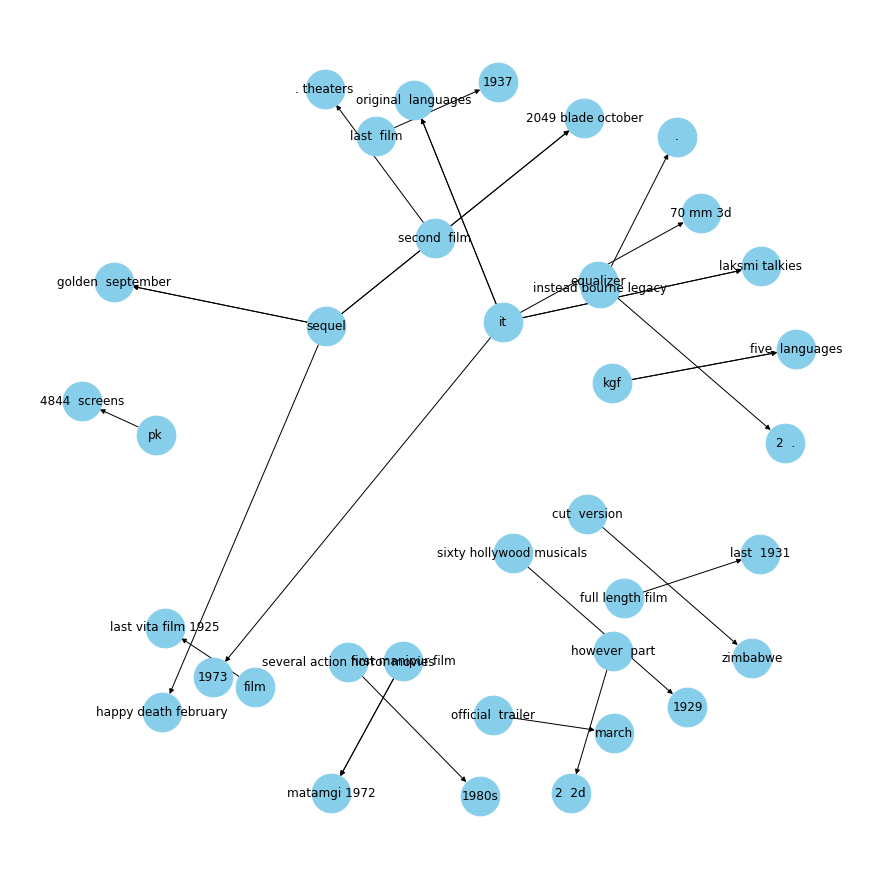

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()